# Q1

The number of multiplications that we need to perform while multiplying two matrices of dimensions (n,k) and (k,m) is n*k*m. We know that the resultant matrix has dimensions (n,m). Which states that there are n*m elements in the final matrix. And we know that each element needs k multiplications, that is row elements of one matrix are multiplied correspondingly with the column elements of the second matrix and this multiplication is possible because the column number of one matrix is same as the row number of the other(k). That implies the total number of multiplications required is 
nmk.


The number of additions that we need to perform while multiplying two matrices of dimensions (n,k) and (k,m) is n*(k-1)*m. As explained above the number of elements in the resultant matrix after multiplication is n*m. The number of additions involved in forming one element of the final matrix is the number of multiplications - 1, that is the number of additions required to form a single element is (k-1). That implies the total number of additions required in numtiplying two matrices is nm(k-1). 

# Q2

In [104]:
import numpy as np
M1=list(np.random.randint(1,20,size=(4,3)))
M2=list(np.random.randint(1,20,size=(3,2)))

In [105]:
def listoflists(M1,M2):
    l=[]
    a=0
    for i in range(len(M1)):
        l1=[]
        for j in range(len(M2[0])):
            for k in range(len(M2)):
                a+=M1[i][k]*M2[k][j]
            l1.append(a)
            a=0
        l.append(l1)
    return l
print(listoflists(M1,M2))            

[[223, 192], [307, 255], [220, 174], [267, 216]]


In [106]:
import numpy as np

In [107]:
l=np.array(M1).dot(np.array(M2))
print(l)

[[223 192]
 [307 255]
 [220 174]
 [267 216]]


In [108]:
import timeit
initials='''
from __main__ import listoflists
import numpy as np
M1=list(np.random.randint(1,100,size=(100,3)))
M2=list(np.random.randint(1,100,size=(3,2)))
'''
test='''
output=listoflists(M1,M2)
'''
loops=1000
totaltime=timeit.timeit(stmt=test, setup=initials, number=1000)
print("for list of lists: ")
print(str((totaltime/loops)*1000)+" ms")

test='''
output=np.array(M1).dot(np.array(M2))
'''
loops=1000
totaltime=timeit.timeit(stmt=test, setup=initials, number=1000)
print("using numpy: ")
print(str((totaltime/loops)*1000)+" ms")

for list of lists: 
0.4621565489999284 ms
using numpy: 
0.04424419800011492 ms


In [109]:
import time
def listofliststime(M1,M2):
    l=[]
    for i in range(1000):
        start=time.time()
        output=listoflists(M1,M2)
        end=time.time()
        l.append((end-start)*1000)
    return np.array(l)
def numpyinbuiltime(M1,M2):
    l=[]
    M1=np.array(M1)
    M2=np.array(M2)
    for i in range(1000):
        start=time.time()
        output=M1.dot(M2)
        end=time.time()
        l.append((end-start)*1000)
    return np.array(l)
lolt=listofliststime(M1,M2)
nit=numpyinbuiltime(M1,M2)
loltmean,loltstd=np.mean(lolt), np.std(lolt)
nitmean,nitstd=np.mean(nit), np.std(nit)
print("mean of listoflists: ", str(loltmean)," ms")
print("standard deviation of listoflists: ", str(loltstd)," ms")
print("mean of inbuilt numpy: ", str(nitmean), " ms")
print("standard deviation of inbuilt numpy: ", str(nitstd)," ms")

mean of listoflists:  0.02675628662109375  ms
standard deviation of listoflists:  0.013662657387177776  ms
mean of inbuilt numpy:  0.001127004623413086  ms
standard deviation of inbuilt numpy:  0.0006813296791331211  ms


We can see that the numpy implementation is about 10 times faster than the nested list implementation of the matrix multiplication. 

This is because numpy is completely built in C language which is faster than python. So, obviously numpy would be faster. Also, python lists are complex, they can store elements of different datatypes, whereas arrays can only store elements of same datatype. 

Memory is contiguously allocated in case of numpy arrays but it is not the case with python lists, making the access harder and longer. 


# Q3

One pass on the array is needed to obtain the highest element. Two passes are needed to find the second highest element. Three passes are required to find the third highest element, and so on. Let n be the length of the array.
We know that the median is the middle element that is (n/2)th largest element in an array of distinct elements, so using the above process we need n/2 steps to find the median. Each pass through the array takes O(n) time to find the largest element. That is, the time complexity of this program in finding the median of an array is $ O(n^{2})$.

In [110]:
import numpy as np
def median(arr):
    l=len(arr)
    i=0
    hashmap={}
    for k in range(l):
        hashmap[k]=-1
    while(i<((l//2) - 1)):
        m=-1
        ans=-1
        for j in range(l):
            if(arr[j]>m and hashmap[j]==-1):
                m=arr[j]
                ans=j
        hashmap[ans]=1
        i+=1
    s=0
    v=0
    i=0
    ans=-1
    while(i<2):
        m=-1
        ans=-1
        for j in range(l):
            if(arr[j]>m and hashmap[j]==-1):
                m=arr[j]
                ans=j
        hashmap[ans]=1
        v=m
        s+=(m/2)
        i+=1
    if(l%2==0):
        return s
    else:
        return v
arr=np.random.randint(1,10,size=(8))
print(arr)
print("median: ",median(arr))

[3 7 3 2 3 7 3 5]
median:  3.0


As mentioned above the median is the middle element in the sorted array if the number of elements in the array is odd, and it is the average of the middle two elements if the number of elements is even.

Using this we can find the median of the array simply by sorting the array. After the array is sorted we return the array[n//2] as the median of the array if the number of elements is odd, else we return (array[n//2]+arr[n//2 - 1])/2 as the median.

This is the better approach than that is given in the question because the only complexity involved in this approach is sorting the array, which takes O(nlog(n)) time. So, the time complexity of this approach is O(nlog(n)), better than the approach given in the question.

In [111]:
def medianbetter(arr):
    arr=np.sort(arr)
    l=len(arr)
    if(l%2==0):
        return (arr[l//2]+arr[l//2 - 1])/2
    else:
        return arr[l//2]
arr=np.random.randint(1,10,size=(8))
print(arr)
print("median: ",medianbetter(arr))

[6 6 5 8 8 3 6 6]
median:  6.0


In [112]:
arr=np.random.randint(1,10,size=(8))
print(arr)
print("median: ", np.median(arr))

[8 9 2 6 9 3 7 9]
median:  7.5


In [113]:
import timeit
initials='''
from __main__ import median
from __main__ import medianbetter
import numpy as np
arr=np.random.randint(1,1000,size=(200))
'''
test='''
output=median(arr)
'''
loops=1000
totaltime=timeit.timeit(stmt=test, setup=initials, number=1000)
print("for given procedure: ")
print(str((totaltime/loops)*1000)+" ms")

test='''
output=medianbetter(arr)
'''
loops=1000
totaltime=timeit.timeit(stmt=test, setup=initials, number=1000)
print("for my better function: ")
print(str((totaltime/loops)*1000)+" ms")

test='''
output=np.median(arr)
'''
loops=1000
totaltime=timeit.timeit(stmt=test, setup=initials, number=1000)
print("using numpy: ")
print(str((totaltime/loops)*1000)+" ms")

for given procedure: 
4.342962244000091 ms
for my better function: 
0.006118949999972756 ms
using numpy: 
0.025161750000052052 ms


In [114]:
import time
def mediantime(arr):
    l=[]
    for i in range(1000):
        start=time.time()
        output=median(arr)
        end=time.time()
        l.append((end-start)*1000)
    return np.array(l)
def medianbettertime(arr):
    l=[]
    for i in range(1000):
        start=time.time()
        output=medianbetter(arr)
        end=time.time()
        l.append((end-start)*1000)
    return np.array(l)
def inbuiltime(arr):
    l=[]
    for i in range(1000):
        start=time.time()
        output=np.median(arr)
        end=time.time()
        l.append((end-start)*1000)
    return np.array(l)
arr=np.random.randint(1,100,size=(100))
mediant=mediantime(arr)
medianbettert=medianbettertime(arr)
inbuilt=inbuiltime(arr)
medianmean, medianstd = np.mean(mediant), np.std(mediant)
medianbettermean, medianbetterstd = np.mean(medianbettert), np.std(medianbettert)
inbuiltmean, inbuiltstd = np.mean(inbuilt), np.std(inbuilt)
print("all are in ms")
print("mean of times through given algorithm: ", medianmean)
print("standard deviation of times through the given algorithm: ", medianstd)
print("mean of times through My algorithm: ", medianbettermean)
print("standard deviation of times through My algorithm: ", medianbetterstd)
print("mean of times through inbuilt function: ",inbuiltmean)
print("standard deviation of times through the inbuilt function: ", inbuiltstd)

all are in ms
mean of times through given algorithm:  1.103450059890747
standard deviation of times through the given algorithm:  0.15135161118753834
mean of times through My algorithm:  0.00410151481628418
standard deviation of times through My algorithm:  0.0042001734309448395
mean of times through inbuilt function:  0.0226137638092041
standard deviation of times through the inbuilt function:  0.017506217927384535


We can see that the time taken for the execution of the algorithm given in the question is higher, as expected because it has time complexity $O(n^{2})$. The time complexity of the better algorithm is $O(nlog(n))$ hence it is lower than that of the $O(n^{2})$ algorithm. Also, we can see that the time taken by the inbuilt function is some what higher than that of the better function which I have written using sorting. 

# Q4

$ Function\; : \; x^{2}y + y^{3}sin(x) $

$ Gradient \; with \; respect \; to \; x \; : \; 2xy + y^{3}cos(x) $

$ Gradient \; with \; respect \; to \; y \; : \; x^{2} + 3y^{2}sin(x) $

# Q5

In [115]:
import jax
import jax.numpy as jnp
from jax import grad
import random
def func(x,y):
    return (x**2)*y + (y**3)*jnp.sin(x)
def diffx(x,y):
    return 2*x*y + y**3*(jnp.cos(x))
def diffy(x,y):
    return x**2 + 3*(y**2)*(jnp.sin(x))
x=random.random()
y=random.random()
jaxdiffx=grad(func)
jaxdiffy=grad(func,argnums=(1))

for i in range(10):
  x=random.random()
  y=random.random()
  print("Using our derivative function w.r.to x: ",diffx(x,y)), print("Using jax derivative function w.r.to x: ",jaxdiffx(x,y))
  print("Using our derivative function w.r.to y: ",diffy(x,y)), print("Using jax derivative function w.r.to y: ",jaxdiffy(x,y))
  print("\n")

Using our derivative function w.r.to x:  1.1243165
Using jax derivative function w.r.to x:  1.1243165
Using our derivative function w.r.to y:  1.01953
Using jax derivative function w.r.to y:  1.01953


Using our derivative function w.r.to x:  0.35654324
Using jax derivative function w.r.to x:  0.35654324
Using our derivative function w.r.to y:  0.02066039
Using jax derivative function w.r.to y:  0.020660391


Using our derivative function w.r.to x:  0.5860236
Using jax derivative function w.r.to x:  0.5860236
Using our derivative function w.r.to y:  0.39341486
Using jax derivative function w.r.to y:  0.39341486


Using our derivative function w.r.to x:  0.19809979
Using jax derivative function w.r.to x:  0.19809979
Using our derivative function w.r.to y:  0.14207925
Using jax derivative function w.r.to y:  0.14207925


Using our derivative function w.r.to x:  1.5906615
Using jax derivative function w.r.to x:  1.5906615
Using our derivative function w.r.to y:  1.4883075
Using jax deriva

# Q6

In [116]:
import sympy

In [117]:
x=sympy.Symbol('x')
y=sympy.Symbol('y')
def func(x,y):
    return (x**2)*y + (y**3)*sympy.sin(x)
print("function: ",func(x,y))
derivx=func(x,y).diff(x)
print("Gradient w.r.to x: ",derivx)
derivy=func(x,y).diff(y)
print("Gradient w.r.to y:",derivy)

function:  x**2*y + y**3*sin(x)
Gradient w.r.to x:  2*x*y + y**3*cos(x)
Gradient w.r.to y: x**2 + 3*y**2*sin(x)


# Q7

In [118]:
dictionary={}
dictionary[2022]={'Branch 1':{1:{'Roll Number': 1, 'Name': "Manish", 'Marks': {'Maths':75, 'Physics':60, 'Chemistry':60}}, 
                             2:{'Roll Number': 2, 'Name': "Manoj", 'Marks': {'Maths':80, 'Physics':60, 'Chemistry':65}}},
                              
                 'Branch 2':{1:{'Roll Number': 1, 'Name': "Nithish", 'Marks': {'Maths':65, 'Physics':67, 'Chemistry':69}}, 
                             2:{'Roll Number': 2, 'Name': "Ravi", 'Marks': {'Maths':78, 'Physics':34, 'Chemistry':50}}}}
dictionary[2023]={}
dictionary[2023]['Branch 1']={}
dictionary[2023]['Branch 2']={}
dictionary[2023]['Branch 2'][3]={'Roll Number': 3, 'Name': "siva", 'Marks': {'Maths':66, 'Physics':67, 'Chemistry':75}}
dictionary[2024]={}
dictionary[2024]['Branch 1']={}
dictionary[2024]['Branch 2']={}
dictionary[2024]['Branch 2'][6]={'Roll Number': 6, 'Name': "balu", 'Marks': {'Maths':65, 'Physics':67, 'Chemistry':69}}
dictionary[2025]={}
dictionary[2025]['Branch 1']={}
dictionary[2025]['Branch 2']={}
dictionary[2025]['Branch 2'][10]={'Roll Number': 10, 'Name': "raj", 'Marks': {'Maths':68, 'Physics':75, 'Chemistry':69}}
print(dictionary)
#1,2,3,6,10 are roll numbers of the students
#likewise we can add entries to the dictionaries

{2022: {'Branch 1': {1: {'Roll Number': 1, 'Name': 'Manish', 'Marks': {'Maths': 75, 'Physics': 60, 'Chemistry': 60}}, 2: {'Roll Number': 2, 'Name': 'Manoj', 'Marks': {'Maths': 80, 'Physics': 60, 'Chemistry': 65}}}, 'Branch 2': {1: {'Roll Number': 1, 'Name': 'Nithish', 'Marks': {'Maths': 65, 'Physics': 67, 'Chemistry': 69}}, 2: {'Roll Number': 2, 'Name': 'Ravi', 'Marks': {'Maths': 78, 'Physics': 34, 'Chemistry': 50}}}}, 2023: {'Branch 1': {}, 'Branch 2': {3: {'Roll Number': 3, 'Name': 'siva', 'Marks': {'Maths': 66, 'Physics': 67, 'Chemistry': 75}}}}, 2024: {'Branch 1': {}, 'Branch 2': {6: {'Roll Number': 6, 'Name': 'balu', 'Marks': {'Maths': 65, 'Physics': 67, 'Chemistry': 69}}}}, 2025: {'Branch 1': {}, 'Branch 2': {10: {'Roll Number': 10, 'Name': 'raj', 'Marks': {'Maths': 68, 'Physics': 75, 'Chemistry': 69}}}}}


# Q8

In [119]:
class year:
    def __init__(self, acadyear):
        self.acadyear=acadyear
        self.branches=[]
    def __str__(self):
        return f"{self.branches}"

class branches:
    def __init__(self, branches):
        self.branches=branches
        self.students=[]
    def __str__(self):
        return f"{self.students}"

class students:
    def __init__(self, name, rollnum, courses, marks):
        self.name=name
        self.rollnum=rollnum
        self.courses=courses
        self.marks=marks
    def __str__(self):
        return f"{[self.name, self.rollnum, self.courses, self.marks]}"


class database:  
    def __init__(self,years):
        self.years = years
        
S1=students("Manish", 20110174, ['Maths','Physics','Chemistry'],[60,70,75])
B1=branches("Branch 1")
Y1=year(2022)
B1.students.append(S1)
Y1.branches.append(B1)
S2=students("Nithish", 20111985, ['Maths','Physics','Chemistry'],[60,70,75])
B2=branches("Branch 2")
B2.students.append(S2)
Y1.branches.append(B2)



S3=students("siva", 20111985, ['Maths','Physics','Chemistry'],[60,70,75])
B3=branches("Branch 1")
Y3=year(2023)
B3.students.append(S3)
Y3.branches.append(B3)
S3=students("rajesh", 2011198, ['Maths','Physics','Chemistry'],[60,70,75])
B3=branches("Branch 2")
B3.students.append(S3)
Y3.branches.append(B3)




S4=students("sunny", 20111985, ['Maths','Physics','Chemistry'],[60,76,75])
B4=branches("Branch 2")
Y4=year(2024)
B4.students.append(S4)
Y4.branches.append(B4)
S4=students("gnana", 2011198, ['Maths','Physics','Chemistry'],[60,70,80])
B4=branches("Branch 2")
B4.students.append(S4)
Y4.branches.append(B4)


S5=students("ganesh", 20111985, ['Maths','Physics','Chemistry'],[67,76,75])
B5=branches("Branch 2")
Y5=year(2025)
B5.students.append(S5)
Y5.branches.append(B5)
S5=students("balu", 2011198, ['Maths','Physics','Chemistry'],[60,70,89])
B5=branches("Branch 1")
B5.students.append(S5)
Y5.branches.append(B5)



years = [Y1,Y3, Y4, Y5]
Records = database(years)

for i in Records.years:
    print(i.acadyear)
    for j in i.branches:
        for k in j.students : 
            print(f"{k.name},{k.rollnum},{k.courses},{k.marks},{j.branches}")
            

            

2022
Manish,20110174,['Maths', 'Physics', 'Chemistry'],[60, 70, 75],Branch 1
Nithish,20111985,['Maths', 'Physics', 'Chemistry'],[60, 70, 75],Branch 2
2023
siva,20111985,['Maths', 'Physics', 'Chemistry'],[60, 70, 75],Branch 1
rajesh,2011198,['Maths', 'Physics', 'Chemistry'],[60, 70, 75],Branch 2
2024
sunny,20111985,['Maths', 'Physics', 'Chemistry'],[60, 76, 75],Branch 2
gnana,2011198,['Maths', 'Physics', 'Chemistry'],[60, 70, 80],Branch 2
2025
ganesh,20111985,['Maths', 'Physics', 'Chemistry'],[67, 76, 75],Branch 2
balu,2011198,['Maths', 'Physics', 'Chemistry'],[60, 70, 89],Branch 1


# Q9

### 1

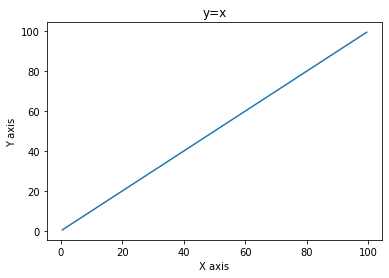

In [120]:
from matplotlib import pyplot as plt
def y(x):
    return x
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=x")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 2

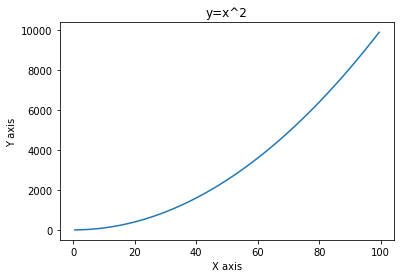

In [121]:
def y(x):
    return x**2
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=x^2")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 3

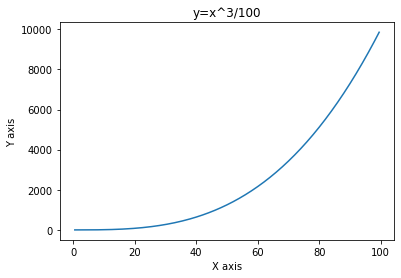

In [122]:
def y(x):
    return (x**3)/100
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=x^3/100")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 4

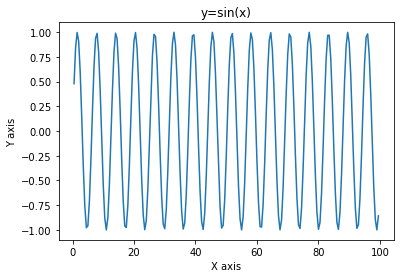

In [123]:
def y(x):
    return np.sin(x)
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=sin(x)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 5

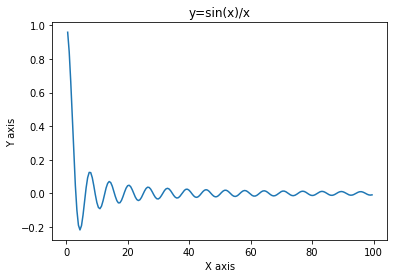

In [124]:
def y(x):
    return np.sin(x)/x
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=sin(x)/x")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 6

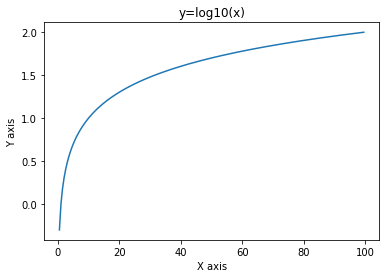

In [125]:
def y(x):
    return np.log10(x)
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=log10(x)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

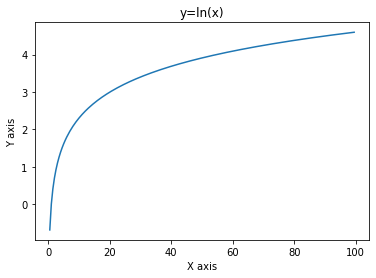

In [126]:
def y(x):
    return np.log(x)
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=ln(x)")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

### 7

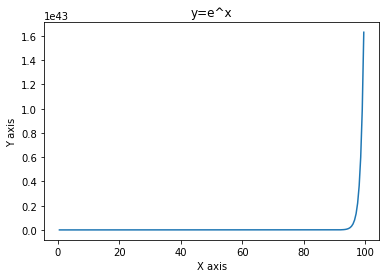

In [127]:
def y(x):
    return np.exp(x)
x=np.arange(0.5,100,0.5)
plt.plot(x, y(x))
plt.title("y=e^x")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.show()

# Q10

In [128]:
a = np.random.uniform(1, 2, (20,5))
print(a)

[[1.65474851 1.87303567 1.62401637 1.11305531 1.2278369 ]
 [1.08675347 1.37229889 1.49587026 1.80657896 1.75281063]
 [1.91643944 1.40656041 1.57772174 1.66924379 1.88762982]
 [1.29091355 1.05156557 1.33787771 1.06197678 1.05821774]
 [1.82621113 1.395529   1.81677285 1.71214734 1.71901469]
 [1.56899875 1.14109128 1.48202801 1.52761375 1.70462287]
 [1.08188709 1.20762786 1.15475301 1.45963796 1.4708352 ]
 [1.57888683 1.04737396 1.05946591 1.50406417 1.89965435]
 [1.52038253 1.56574291 1.41530917 1.32117818 1.19469301]
 [1.46390924 1.4862417  1.78867139 1.66079868 1.86715985]
 [1.75384169 1.76410022 1.35117878 1.78194279 1.67614601]
 [1.78054224 1.06769982 1.44598572 1.19376247 1.95974982]
 [1.82970505 1.37206518 1.77086888 1.30250839 1.7853407 ]
 [1.88725473 1.20427485 1.87762758 1.48470008 1.45412371]
 [1.51385952 1.72285017 1.21617364 1.86058604 1.36998007]
 [1.49218706 1.27445732 1.79673197 1.89035173 1.8007416 ]
 [1.33248169 1.24603914 1.62252132 1.92255166 1.95973891]
 [1.45006831 1

In [129]:
import pandas as pd

In [130]:
col=["a","b","c","d","e"]
d=pd.DataFrame(a,columns=col)

In [131]:
d.head(10)

,a,b,c,d,e
0,1.654749,1.873036,1.624016,1.113055,1.227837
1,1.086753,1.372299,1.495870,1.806579,1.752811
2,1.916439,1.406560,1.577722,1.669244,1.887630
3,1.290914,1.051566,1.337878,1.061977,1.058218
4,1.826211,1.395529,1.816773,1.712147,1.719015
5,1.568999,1.141091,1.482028,1.527614,1.704623
6,1.081887,1.207628,1.154753,1.459638,1.470835
7,1.578887,1.047374,1.059466,1.504064,1.899654
8,1.520383,1.565743,1.415309,1.321178,1.194693
9,1.463909,1.486242,1.788671,1.660799,1.867160


In [132]:
d.std(axis=0)

a    0.261580
b    0.233944
c    0.241995
d    0.278285
e    0.319908
dtype: float64

In [133]:
print(max(d.std(axis=0)))

0.3199081290963498


In [134]:
type(d.std(axis=0))

pandas.core.series.Series

In [135]:
columndev=-1
maxdev=-1
for column in col:
    if(d[column].std()>maxdev):
        maxdev=d[column].std()
        columndev=column
print("highest standard deviation",maxdev)
print("Column with highest standard deviation: ",columndev)
print("printing the cloumn with highest standard deviation\n",d[columndev])

highest standard deviation 0.3199081290963498
Column with highest standard deviation:  e
printing the cloumn with highest standard deviation
 0     1.227837
1     1.752811
2     1.887630
3     1.058218
4     1.719015
5     1.704623
6     1.470835
7     1.899654
8     1.194693
9     1.867160
10    1.676146
11    1.959750
12    1.785341
13    1.454124
14    1.369980
15    1.800742
16    1.959739
17    1.038304
18    1.768731
19    1.063808
Name: e, dtype: float64


In [136]:
d.mean(axis=1)

0     1.498539
1     1.502862
2     1.691519
3     1.160110
4     1.693935
5     1.484871
6     1.274948
7     1.417889
8     1.403461
9     1.653356
10    1.665442
11    1.489548
12    1.612098
13    1.581596
14    1.536690
15    1.650894
16    1.616667
17    1.403523
18    1.562068
19    1.595298
dtype: float64

In [137]:
print(min(d.mean(axis=1)))

1.1601102700322943


In [138]:
colmean=["mean"]
df1=pd.DataFrame(d.mean(axis=1), columns=colmean)
print(df1)

        mean
0   1.498539
1   1.502862
2   1.691519
3   1.160110
4   1.693935
5   1.484871
6   1.274948
7   1.417889
8   1.403461
9   1.653356
10  1.665442
11  1.489548
12  1.612098
13  1.581596
14  1.536690
15  1.650894
16  1.616667
17  1.403523
18  1.562068
19  1.595298


In [139]:
print(df1[df1["mean"] == df1["mean"].min()])

      mean
3  1.16011


In [140]:
print("Row with the lowest mean:\n",d[df1["mean"] == df1["mean"].min()])

Row with the lowest mean:
           a         b         c         d         e
3  1.290914  1.051566  1.337878  1.061977  1.058218


# Q11

In [141]:
f=d["a"]+d["b"]+d["c"]+d["d"]+d["e"]
print(f)

0     7.492693
1     7.514312
2     8.457595
3     5.800551
4     8.469675
5     7.424355
6     6.374741
7     7.089445
8     7.017306
9     8.266781
10    8.327209
11    7.447740
12    8.060488
13    7.907981
14    7.683449
15    8.254470
16    8.083333
17    7.017616
18    7.810339
19    7.976491
dtype: float64


In [142]:
type(f)

pandas.core.series.Series

In [143]:
df=pd.DataFrame(f,columns=["f"])
df.head()

,f
0,7.492693
1,7.514312
2,8.457595
3,5.800551
4,8.469675


In [144]:
df2 = pd.concat([d, df], axis=1)
df2.head()

,a,b,c,d,e,f
0,1.654749,1.873036,1.624016,1.113055,1.227837,7.492693
1,1.086753,1.372299,1.495870,1.806579,1.752811,7.514312
2,1.916439,1.406560,1.577722,1.669244,1.887630,8.457595
3,1.290914,1.051566,1.337878,1.061977,1.058218,5.800551
4,1.826211,1.395529,1.816773,1.712147,1.719015,8.469675


In [145]:
df2["g"] = np.where(df2["f"] >= 8, "GT8", "LT8")

In [146]:
df2.head()

,a,b,c,d,e,f,g
0,1.654749,1.873036,1.624016,1.113055,1.227837,7.492693,LT8
1,1.086753,1.372299,1.495870,1.806579,1.752811,7.514312,LT8
2,1.916439,1.406560,1.577722,1.669244,1.887630,8.457595,GT8
3,1.290914,1.051566,1.337878,1.061977,1.058218,5.800551,LT8
4,1.826211,1.395529,1.816773,1.712147,1.719015,8.469675,GT8


In [147]:
print("The number of rows in the dataframe where the value in the column “g” is “LT8”: ", df2[df2.f<8].shape[0])

The number of rows in the dataframe where the value in the column “g” is “LT8”:  13


In [148]:
print(df2["f"].std())

0.7021474027682498


In [149]:
isLT8=df2.g=="LT8"
df2[isLT8]

,a,b,c,d,e,f,g
0,1.654749,1.873036,1.624016,1.113055,1.227837,7.492693,LT8
1,1.086753,1.372299,1.495870,1.806579,1.752811,7.514312,LT8
3,1.290914,1.051566,1.337878,1.061977,1.058218,5.800551,LT8
5,1.568999,1.141091,1.482028,1.527614,1.704623,7.424355,LT8
6,1.081887,1.207628,1.154753,1.459638,1.470835,6.374741,LT8
7,1.578887,1.047374,1.059466,1.504064,1.899654,7.089445,LT8
8,1.520383,1.565743,1.415309,1.321178,1.194693,7.017306,LT8
11,1.780542,1.067700,1.445986,1.193762,1.959750,7.447740,LT8
13,1.887255,1.204275,1.877628,1.484700,1.454124,7.907981,LT8
14,1.513860,1.722850,1.216174,1.860586,1.369980,7.683449,LT8


In [150]:
print("The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”: ", df2[isLT8]["f"].std())

The standard deviation of the column “f” for the rows where the value in the column “g” is “LT8”:  0.6227962752435128


In [151]:
isGT8=df2.g=="GT8"
df2[isGT8]

,a,b,c,d,e,f,g
2,1.916439,1.406560,1.577722,1.669244,1.887630,8.457595,GT8
4,1.826211,1.395529,1.816773,1.712147,1.719015,8.469675,GT8
9,1.463909,1.486242,1.788671,1.660799,1.867160,8.266781,GT8
10,1.753842,1.764100,1.351179,1.781943,1.676146,8.327209,GT8
12,1.829705,1.372065,1.770869,1.302508,1.785341,8.060488,GT8
15,1.492187,1.274457,1.796732,1.890352,1.800742,8.254470,GT8
16,1.332482,1.246039,1.622521,1.922552,1.959739,8.083333,GT8


In [152]:
print("The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”: ", df2[isGT8]["f"].std())

The standard deviation of the column “f” for the rows where the value in the column “g” is “GT8”:  0.16186499640012605


# Q12

In [153]:
a=np.random.randint(1,100,size=(3,2))
b=np.random.randint(1,100,size=(1,2))
d,e=a.shape
f,g=b.shape
c=np.zeros((d,g), dtype=int)
for i in range(d):
    for j in range(g):
        c[i][j]=a[i][j]+b[0][j]
print("How numpy works:\n",c)
print("Numpy addition:\n",a+b)

How numpy works:
 [[ 62 106]
 [ 73  50]
 [149 103]]
Numpy addition:
 [[ 62 106]
 [ 73  50]
 [149 103]]


Here we are adding two arrays of dimensions (3,2) and (1,2) by seeing the dimensions of the arrays we think that they ae incompatible for addition. But, here comes numpy broadcasting, the second array is viewed as (3,2) dimension with the first row duplicating into the remaining 2 rows. That is, if:
$ a=[[1,2],[3,4],[5,6]] \; and \; b=[1,1] $ then, b can be viewed as $ b=[[1,1],[1,1],[1,1]] $ and thus we can add then resulting in the final array $ c=[[2,3],[4,5],[6,7]] $

# Q13

In [154]:
arr=np.random.randint(1,100,size=(3,3,3))
print(arr)

[[[16 71 73]
  [66  7 55]
  [ 7 35 32]]

 [[51 67 83]
  [91 57 64]
  [38 71 67]]

 [[ 8 97  1]
  [12 90  8]
  [ 2  9 37]]]


In [155]:
def f(arr):
    arr=arr.flatten()
    mini=0
    for i in range(len(arr)):
        if(arr[i]<arr[mini]):
            mini=i
    return mini

In [156]:
print("my function: ", f(arr))
print("numpy function: ", np.argmin(arr))

my function:  20
numpy function:  20
